# Logistic Regression

### Import necessary modules

In [20]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Load data in

In [21]:
data = pd.read_csv('./data/exam_passing_rate.csv',
                   names=['exam1', 'exam2', 'passed'])
data.insert(0, 'ones', 1)

### Visualise data

Text(0.5,1,'Exam pass/fail scores')

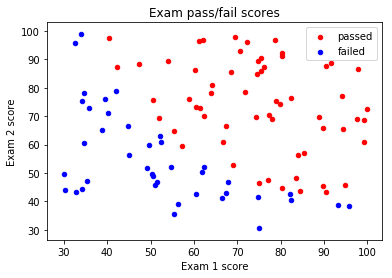

In [22]:
passed = data[data['passed'] == 1]
failed = data[data['passed'] == 0]

ax = passed.plot('exam1', 'exam2', kind='scatter', label='passed', c='red')
failed.plot('exam1', 'exam2', kind='scatter', label='failed', c='blue', ax=ax)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Exam pass/fail scores')

## Logistic Regression Using Gradient Descent
This demo was created with the notes found on the website [here](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)

### Load in data

In [23]:
x_matrix = data[['ones', 'exam1', 'exam2']].values
y_vector = data[['passed']].values

### Create functions to do gradient descent and calculate loss

In [7]:
def calc_sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def calc_hypothesis(features, weights):
    return sigmoid(np.dot(features, weights))

In [16]:
def calc_loss(hypothesis, targets):
    y = targets
    h = hypothesis
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [71]:
def calc_gradient(hypothesis, features, targets):
    y = targets
    X = features
    h = hypothesis
    error = h - y
    return np.dot(X.T, error) / y.shape[0]

In [51]:
def update_weights(weights, learning_rate, gradient):
    weights = weights - (learning_rate * gradient)
    return weights

In [17]:
def predict(features, weights, theshold=0.5):
    return calc_hypothesis(features, weights) >= 0.5

### Set hyper-parameters

In [106]:
iterations = 1000000
learning_rate = 0.0001
weights = np.zeros(shape=(3, 1))

### Train the model

In [107]:
loss = np.zeros(iterations)
for iteration in range(iterations):
    hypothesis = calc_hypothesis(x_matrix, weights)
    gradient = calc_gradient(hypothesis, x_matrix, y_vector)
    loss[iteration] = calc_loss(hypothesis, y_vector)
    weights = update_weights(weights, learning_rate, gradient)

### Plot loss at each  iteration to ensure model is working

Initial Loss: 0.6931471805599453
Final LossE: 0.3873901196437476


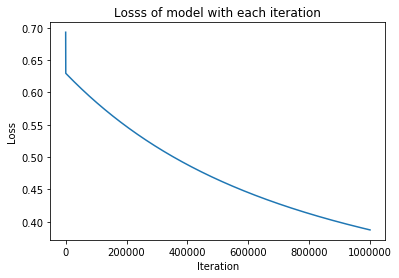

In [135]:
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), loss)
ax.set_title('Losss of model with each iteration')
ax.set_ylabel('Loss')
ax.set_xlabel('Iteration')
print(f'Initial Loss: {loss[0]}')
print(f'Final LossE: {loss[-1]}')

### Re-plot data with the predicted decision boundary
The chosen threshold is 0.5 by default

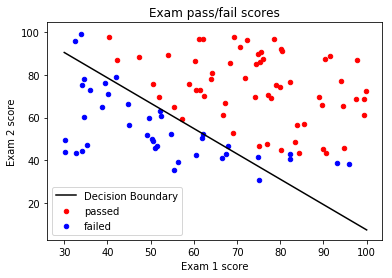

In [133]:
x_points = np.linspace(30, 100, 2)
intercept = - weights[0] / weights[2]
slope = - weights[1] / weights[2]
y_points = x_points * slope + intercept

ax = passed.plot('exam1', 'exam2', kind='scatter', label='passed', c='red')
ax.plot(x_points, y_points, c='black', label='Decision Boundary')
failed.plot('exam1', 'exam2', kind='scatter', label='failed', c='blue', ax=ax)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Exam pass/fail scores')
ax.legend()

### Calculate  accuracy

In [142]:
accuracy = 1 - (predict(x_matrix, weights) - y_vector).mean()
print(f'The model is {accuracy * 100}% accurate')

The model is 91.0% accurate
